In [16]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
np.random.seed(123)
lat_lngs = []
cities = []
geo_data = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination

for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        geo_data.append({'City':city.city_name.title(),'Country':city.country_code.upper(), 'Lat':lat_lng[0], 'Lon':lat_lng[1]})
geo_df = pd.DataFrame(geo_data)


# Print the city count to confirm sufficient count
len(geo_df)

865

In [3]:
lat_bins = list(range(-90,91,10))
lon_bins = list(range(-180,181,20))
geo_df['Lat Bin'] = pd.cut(geo_df['Lat'],lat_bins)
geo_df['Lon Bin'] = pd.cut(geo_df['Lon'], lon_bins)


In [4]:
lat_group = pd.DataFrame(geo_df.groupby('Lat Bin')['City'].count())
lat_group = lat_group.rename(columns = {'City':'# of Cities'})
lat_group

,# of Cities
Lat Bin,
"(-90, -80]",1
"(-80, -70]",2
"(-70, -60]",4
"(-60, -50]",9
"(-50, -40]",19
"(-40, -30]",46
"(-30, -20]",52
"(-20, -10]",71
"(-10, 0]",64


### Inspect the Distribution of Cities

The below scatter plot of the randomly generated latitudes and longitudes appears to have a faily uniform distribution as was intended.

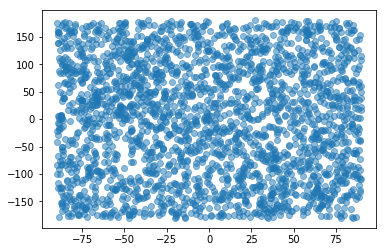

In [5]:
plt.scatter(lats,lngs, alpha = 0.5)
plt.show()

The following three plots show that the uniformity from above did not survive the transformation into a city list. This is mainly due to the fact that the planet's land surface is not uniformly distributed along either axis. Additionaly, the citipy function that was used to generate the city list, did not include cities whose population is under 500. Because fo this limitation, the current disitrubtion of acceptably close to uniform.

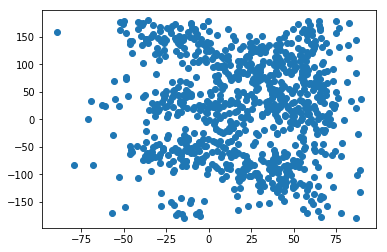

In [6]:
plt.scatter(geo_df['Lat'],geo_df['Lon'])
plt.show()

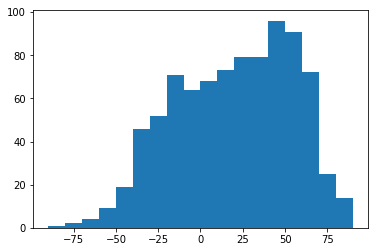

In [7]:
plt.hist(geo_df['Lat'],lat_bins)
plt.show()

(array([15., 17., 27., 34., 55., 65., 55., 38., 36., 63., 80., 60., 56.,
        56., 56., 60., 51., 41.]),
 array([-180, -160, -140, -120, -100,  -80,  -60,  -40,  -20,    0,   20,
          40,   60,   80,  100,  120,  140,  160,  180]),
 <a list of 18 Patch objects>)

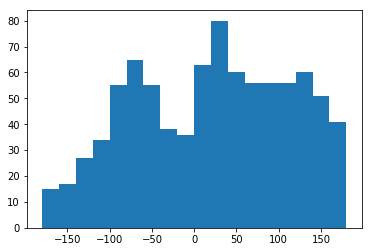

In [8]:
plt.hist(geo_df['Lon'],lon_bins)

## Perform API Calls

Now that the city list has been built, the OpenWeatherMap API will be used to retrieve weather data for each city. Store temp, humidity, cludiness, and wind speed for each city. 

In [33]:
#Initialize lists to store weather results as dictionaries, and info about cities not found
weather_results = []
cities_not_found = []
counter = 1

# Starting URL for Weather Map API Call

for i in range(len(geo_df)):
    url = f"http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID={api_key}&q={geo_df['City'][i]},{geo_df['Country'][i]}"
    
    try:
        resp = requests.get(url).json()
        weather_results.append({'City':geo_df['City'][i],
                                'Country':geo_df['Country'][i],
                                'Temperature':resp['main']['temp'],
                                'Minimum Temperature (F)':resp['main']['temp_min'],
                                'Maximum Temperature (F)':resp['main']['temp_max'],
                                'Humidity (%)':resp['main']['humidity'],
                                'Wind Speed (mph)':resp['wind']['speed']})
        
        print(f"City #{counter}: {geo_df['City'][i]},{geo_df['Country'][i]}")
        counter += 1
    except:
        cities_not_found.append([geo_df['City'][i],geo_df['Country'][i]])
        print(f"{geo_df['City'][i]},{geo_df['Country'][i]} Not Found!")
        
    #time.sleep(0.05)
    # json.dumps(resp)

City #1: Ahuimanu,US
City #2: Busselton,AU
Mataura,PF Not Found!
City #3: Port Blair,IN
City #4: Dandong,CN
City #5: Georgetown,SH
City #6: Longyearbyen,SJ
City #7: Juegang,CN
Tabiauea,KI Not Found!
City #8: Pangai,TO
City #9: Rikitea,PF
City #10: Khasan,RU
City #11: Victoria,SC
City #12: Ushuaia,AR
City #13: Port Hardy,CA
City #14: Vaini,TO
City #15: Matara,LK
City #16: Ugoofaaru,MV
City #17: Shingu,JP
City #18: Iqaluit,CA
City #19: Lagoa,PT
City #20: Hopelchen,MX
Tazagyukh,AM Not Found!
Taolanaro,MG Not Found!
City #21: Vila Velha,BR
City #22: Hobart,AU
City #23: Jamestown,SH
City #24: Katsuura,JP
City #25: Honiara,SB
Bengkulu,ID Not Found!
City #26: Puerto Ayora,EC
City #27: Grand Gaube,MU
City #28: Lebu,CL
City #29: Huancavelica,PE
City #30: Thompson,CA
Barentsburg,SJ Not Found!
City #31: Port Elizabeth,ZA
City #32: Rio Grande,BR
City #33: Mahajanga,MG
City #34: Sisimiut,GL
City #35: Albany,AU
City #36: Atuona,PF
City #37: Yellowknife,CA
City #38: Nishihara,JP
City #39: Punta Arena

City #304: Verkhnyaya Inta,RU
City #305: Hobyo,SO
City #306: Geraldton,AU
City #307: Cayenne,GF
City #308: Dudinka,RU
City #309: Cadillac,US
Goderich,SL Not Found!
Freetown,AG Not Found!
City #310: Kulhudhuffushi,MV
City #311: Oromocto,CA
City #312: Beeville,US
City #313: Anaconda,US
City #314: Petropavlovsk-Kamchatskiy,RU
City #315: Solnechnyy,RU
City #316: Camacari,BR
Marzuq,LY Not Found!
City #317: Svetlaya,RU
City #318: Havoysund,NO
City #319: Jaisalmer,IN
Langangen,NO Not Found!
City #320: Rocha,UY
City #321: Meulaboh,ID
City #322: Port Keats,AU
City #323: Isangel,VU
Phan Rang,VN Not Found!
City #324: Te Anau,NZ
Camana,PE Not Found!
City #325: Tripoli,LY
City #326: Kaitangata,NZ
City #327: Fort Nelson,CA
City #328: Walvis Bay,NA
City #329: Waipawa,NZ
Duz,TN Not Found!
City #330: Ilheus,BR
City #331: Lithgow,AU
City #332: Biak,ID
City #333: Asyut,EG
City #334: Komsomolskiy,RU
City #335: Musoma,TZ
City #336: Chifeng,CN
Airai,PW Not Found!
City #337: Bathsheba,BB
City #338: Broome,AU

City #606: Forrest City,US
City #607: Berlevag,NO
Isabela,US Not Found!
City #608: Diffa,NE
City #609: Zapolyarnyy,RU
City #610: General Roca,AR
Unye,TR Not Found!
City #611: Ambilobe,MG
X-Can,MX Not Found!
City #612: Ponta Delgada,PT
City #613: Palmer,US
City #614: Quatre Cocos,MU
City #615: Darhan,MN
City #616: Bago,MM
City #617: Alvaro Obregon,MX
City #618: Dong Hoi,VN
City #619: Junin,AR
Hihifo,TO Not Found!
City #620: Corn Island,NI
City #621: Northam,AU
City #622: Akureyri,IS
City #623: Pendleton,US
City #624: Oranjemund,NA
City #625: Quthing,LS
City #626: Keningau,MY
City #627: Maragogi,BR
City #628: Kyabram,AU
City #629: Yuanping,CN
City #630: Miedzyrzecz,PL
City #631: Kurchum,KZ
City #632: Charsadda,PK
City #633: Nemuro,JP
City #634: Yahotyn,UA
Barawe,SO Not Found!
City #635: Pali,IN
City #636: Normandin,CA
City #637: Puerto Penasco,MX
City #638: Madang,PG
City #639: Yingcheng,CN
City #640: Katobu,ID
City #641: Koumac,NC
City #642: Ossora,RU
Mahon,ES Not Found!
City #643: Ojin

temp = resp['main']['temp']
min_temp = resp['main']['temp_min']
max_temp = resp['main']['temp_max']
hum = resp['main']['humidity']
wind = resp['wind']['speed']

In [10]:
geo_df.head()

,City,Country,Lat,Lon,Lat Bin,Lon Bin
0,Ahuimanu,US,35.364453,-152.133998,"(30, 40]","(-160, -140]"
1,Busselton,AU,-38.494920,101.585414,"(-40, -30]","(100, 120]"
2,Mataura,PF,-49.166738,-158.820552,"(-50, -40]","(-160, -140]"
3,Port Blair,IN,9.236658,94.056278,"(0, 10]","(80, 100]"
4,Dandong,CN,39.504415,124.047605,"(30, 40]","(120, 140]"


In [32]:
len(cities_not_found)

120

In [29]:
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=142c635c6f7aa1713464e3386e3e87d8&q=Mataura,PF'
resp = requests.get(url).json()
resp

{'cod': '404', 'message': 'city not found'}